In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [39]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0



In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.5185 - accuracy: 0.4445 - val_loss: 1.3553 - val_accuracy: 0.5151
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1472 - accuracy: 0.5941 - val_loss: 1.0718 - val_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9930 - accuracy: 0.6521 - val_loss: 1.0165 - val_accuracy: 0.6435
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8931 - accuracy: 0.6869 - val_loss: 0.9484 - val_accuracy: 0.6745
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8133 - accuracy: 0.7163 - val_loss: 0.9213 - val_accuracy: 0.6824
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7527 - accuracy: 0.7390 - val_loss: 0.8584 - val_accuracy: 0.7058
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7002 - accuracy: 0.7548 - val_loss: 0.8727 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - loss: 0.8416 - accuracy: 0.7226 - 2s/epoch - 8ms/step
Test accuracy: 0.722599983215332


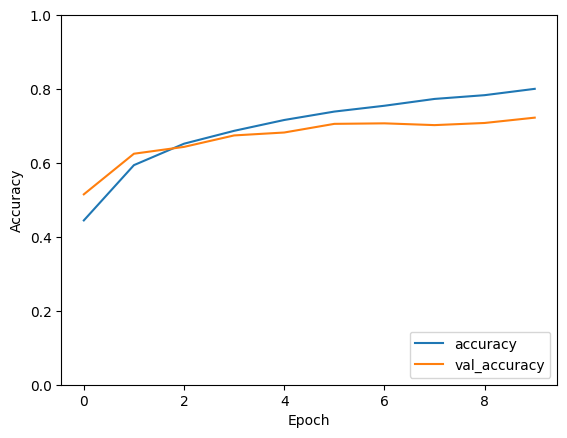

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
model.save('cifar10_model.h5')
#

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import tensorflow as tf

In [17]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

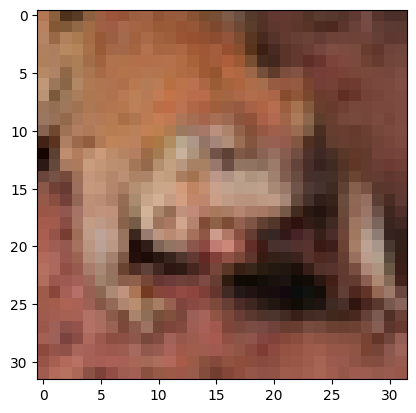

In [42]:
plt.imshow(test_images[5])


In [31]:
import tensorflow as tf
import numpy as np

In [37]:
score=model.predict(test_images[5].reshape(1,32,32,3))

1/1 [==============================] - 0s 20ms/step


In [38]:
score = tf.nn.softmax(score)
print(score)

tf.Tensor(
[[5.1759713e-04 7.3250179e-04 6.7418576e-03 4.6479251e-02 3.2630015e-02
  3.2359359e-01 4.5773879e-01 1.3093728e-01 3.1496304e-05 5.9769658e-04]], shape=(1, 10), dtype=float32)


In [40]:
labels[np.argmax(score)]

'frog'